In [6]:
import torch
from diffusers import StableDiffusionImg2ImgPipeline
import requests
from PIL import Image
from io import BytesIO
import gc

In [3]:
from random import SystemRandom
randr = SystemRandom()
#randr.randrange(0xFFFFFFFFFFFFFFFF)

import requests
from PIL import Image
from io import BytesIO
from math import ceil

def flex_grid(imgs, cols):
  rows=ceil(len(imgs)/cols)

  w, h = imgs[0].size
  grid = Image.new('RGB', size=(cols*w, rows*h))

  for i, img in enumerate(imgs):
      grid.paste(img, box=(i%cols*w, i//cols*h))
  return grid

In [7]:
if 'pipeI' in globals():
    del pipeI
    gc.collect()
    torch.cuda.empty_cache()

pipeI = StableDiffusionImg2ImgPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16).to('cuda')
def disabled_safety_checker(images, clip_input):
    if len(images.shape)==4:
        num_images = images.shape[0]
        return images, [False]*num_images
    else:
        return images, False
pipeI.safety_checker = disabled_safety_checker

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [8]:
#url='https://i.ibb.co/0tGnRy9/bitmap.png'
url='https://i.ibb.co/2k4RsZC/square-button-gem.png'
response = requests.get(url)
init_image = Image.open(BytesIO(response.content)).convert("RGB")

  0%|          | 0/800 [00:00<?, ?it/s]

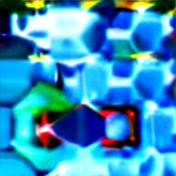

In [9]:
prompt = "shiny game button for medieval strategy game, aoe2, age of empires, ui button, deviantart, polished, high definition"
# 15188487441138912890, 11557893648125139578, 5843607100063926302, 13675703939717579796, 4063517100596601597, 6072418352234782754
seed=6072418352234782754
num_inference_steps=1000

generator = torch.Generator("cuda").manual_seed(seed)
pipeI(prompt, image=init_image, generator=generator, num_inference_steps=num_inference_steps).images[0]

In [18]:
num_cols = 3
num_images = 9
prompt = "shiny game button for medieval strategy game, starcraft, ui button, deviantart, polished, high definition"

images = []
for i in range(num_images):
  seed = randr.randrange(0xFFFFFFFFFFFFFFFF)
  print(f'Generating {i + 1} of {num_images} with seed = {seed}')
  generator = torch.Generator("cuda").manual_seed(seed)
  images.extend(pipeI(prompt, image=init_image, generator=generator, num_inference_steps=15).images)

grid = flex_grid(images, cols=num_cols)
grid

# 15188487441138912890, 11557893648125139578, 5843607100063926302, 13675703939717579796, 4063517100596601597, 6072418352234782754

Generating 1 of 9 with seed = 6915636844162496044


RuntimeError: CUDA error: CUBLAS_STATUS_NOT_INITIALIZED when calling `cublasCreate(handle)`

In [5]:
import gc
# del init_latent_dist
# del init_image
del pipeI
gc.collect()
torch.cuda.empty_cache()
print(torch.cuda.memory_summary(device=None, abbreviated=False))

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 1            |        cudaMalloc retries: 1         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      | 328546 KiB | 328546 KiB | 328546 KiB |      0 B   |
|       from large pool | 327680 KiB | 327680 KiB | 327680 KiB |      0 B   |
|       from small pool |    866 KiB |    866 KiB |    866 KiB |      0 B   |
|---------------------------------------------------------------------------|
| Active memory         | 328546 KiB | 328546 KiB | 328546 KiB |      0 B   |
|       from large pool | 327680 KiB | 327680 KiB | 327680 KiB |

In [2]:
print(torch.cuda.memory_summary(device=None, abbreviated=False))

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |      0 B   |      0 B   |      0 B   |      0 B   |
|       from large pool |      0 B   |      0 B   |      0 B   |      0 B   |
|       from small pool |      0 B   |      0 B   |      0 B   |      0 B   |
|---------------------------------------------------------------------------|
| Active memory         |      0 B   |      0 B   |      0 B   |      0 B   |
|       from large pool |      0 B   |      0 B   |      0 B   |

In [10]:
globals()

{'__name__': '__main__',
 '__doc__': 'Automatically created module for IPython interactive environment',
 '__package__': None,
 '__loader__': None,
 '__spec__': None,
 '__builtin__': <module 'builtins' (built-in)>,
 '__builtins__': <module 'builtins' (built-in)>,
 '_ih': ['',
  'import torch\nfrom diffusers import StableDiffusionImg2ImgPipeline\nimport requests\nfrom PIL import Image\nfrom io import BytesIO',
  "from random import SystemRandom\nrandr = SystemRandom()\n#randr.randrange(0xFFFFFFFFFFFFFFFF)\n\nimport requests\nfrom PIL import Image\nfrom io import BytesIO\nfrom math import ceil\n\ndef flex_grid(imgs, cols):\n  rows=ceil(len(imgs)/cols)\n\n  w, h = imgs[0].size\n  grid = Image.new('RGB', size=(cols*w, rows*h))\n\n  for i, img in enumerate(imgs):\n      grid.paste(img, box=(i%cols*w, i//cols*h))\n  return grid",
  'pipeI = StableDiffusionImg2ImgPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16).to(\'cuda\')\npipeI.safety_checker = lambda im